In [1]:
import numpy as np
import ceo
from ceo.pyramid import Pyramid as Pym
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N_SIDE_LENSLET=92
n = N_SIDE_LENSLET*32
gmt = ceo.GMT_MX()

In [3]:
src = ceo.Source('V',zenith=0,azimuth=0,
                rays_box_size=25.5,
                rays_box_sampling=n,
                rays_origin=[0,0,25])
src>>(gmt,)
+src
src.wavefront.rms(-9)

array([0.76299195])

In [4]:
pym = Pym(N_SIDE_LENSLET,n,modulation=0.0,separation=2)
src>>(gmt,pym)

(@CEO)>Pyramid: Set modulation sampling to 0


In [5]:
132/92

1.434782608695652

In [6]:
pym.camera.reset()
pym.separation = 132/92    

In [7]:
%%time
+src

CPU times: user 652 ms, sys: 3.19 ms, total: 655 ms
Wall time: 652 ms


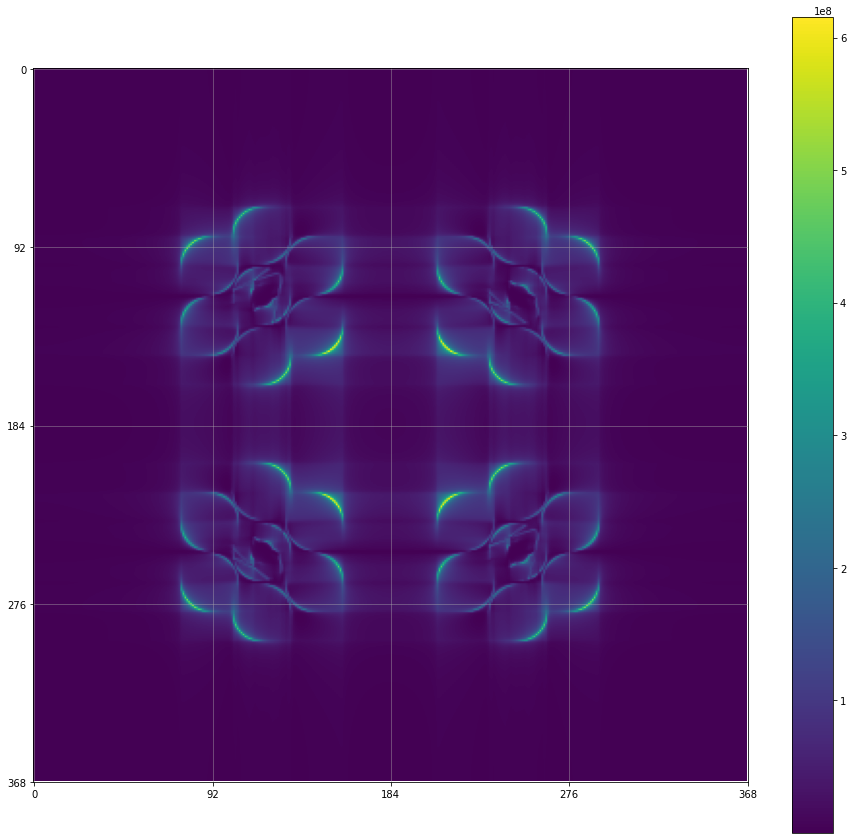

In [8]:
fig = plt.figure()
fig.set_size_inches(16,15)
plt.imshow(pym.camera.frame.host())
plt.colorbar()
u = np.arange(0,pym.camera.frame.host().shape[0]*5/4,pym.camera.frame.host().shape[0]/4)
plt.xticks(u)
plt.yticks(u)
plt.grid(alpha=0.5)

In [9]:
pym.camera.frame.host().shape[0]

368

In [10]:
(10*ceo.constants.RAD2ARCSEC*src.wavelength/8.365)/(ceo.constants.RAD2ARCSEC*src.wavelength/25.5)

30.484160191273165

In [11]:
src.rays.rot_angle = np.pi/12*0
pym.high_pass_diam = 10
pym.camera.reset()
+src

In [12]:
pym.camera.frame.host().sum()/3122743200000.0

0.3702642323147161

In [13]:
pym.camera.frame.host().sum()

1156240100000.0

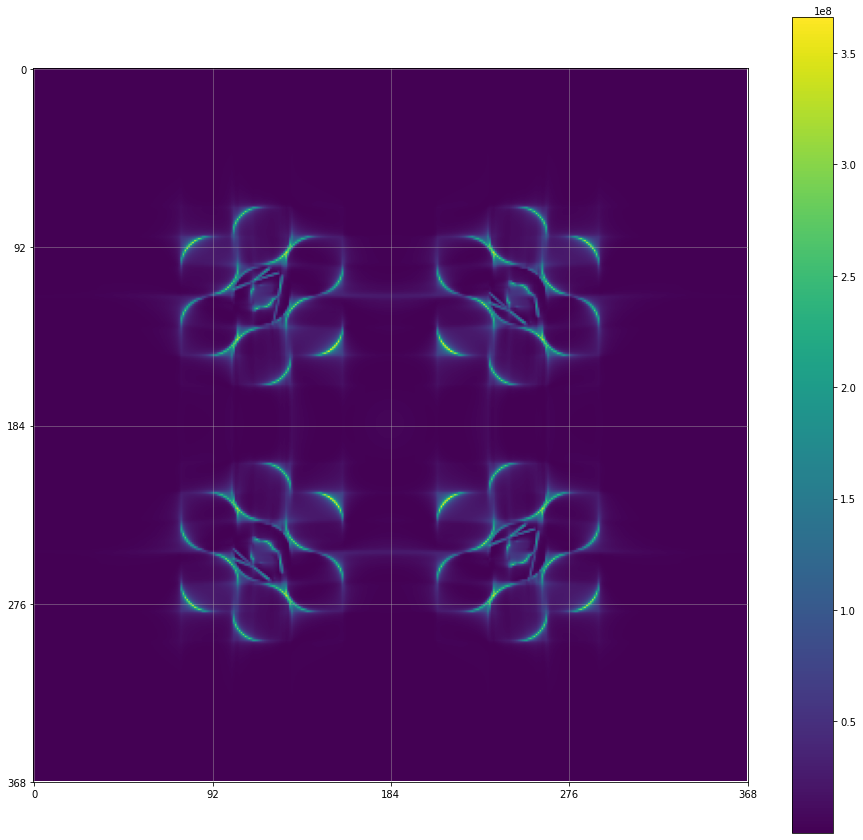

In [14]:
fig = plt.figure()
fig.set_size_inches(16,15)
plt.imshow(pym.camera.frame.host())
plt.colorbar()
plt.xticks(u)
plt.yticks(u)
plt.grid(alpha=0.5)

In [42]:
imgr = ceo.Imaging(N_PX_PUPIL=n-1,N_PX_IMAGE=64)

In [43]:
imgr.reset()
src>>(gmt,imgr)
+src
imgr.readOut(1e-3,0)

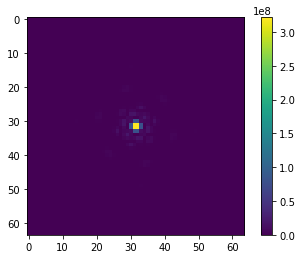

In [44]:
plt.imshow(imgr.frame.host())#/imgr.frame.host_data.max())
plt.colorbar()
#plt.clim([0,0.5])

In [45]:
imgr.frame.host_data.sum()/src.nPhoton/357

array([0.00092626])

In [46]:
src>>(gmt,pym)

In [47]:
pym.camera.reset()
pym.modulation = 0
+src
pym.camera.readOut(1e-6,15)

(@CEO)>Pyramid: Set modulation sampling to 0


In [48]:
pym.camera.frame.host().std()

41.74652

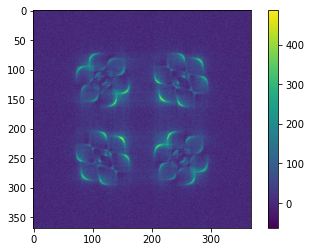

In [49]:
plt.imshow(pym.camera.frame.host())
plt.colorbar()

In [50]:
pym.camera

In [51]:
pym.camera.frame.host_data.sum()/(1e-6*src.nPhoton*357)

array([0.94492632])

(@CEO)>Pyramid: Set modulation sampling to 36


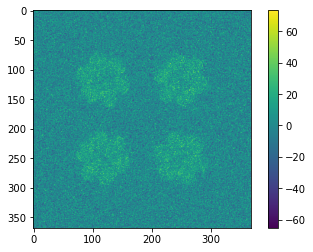

In [52]:
pym.camera.reset()
pym.modulation = 3
+src
pym.camera.readOut(1e-7,15)
plt.imshow(pym.camera.frame.host())
plt.colorbar()

In [23]:
pym.modulation_sampling

36

In [24]:
pym.camera.N_FRAME

1